In [32]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble.forest import _generate_unsampled_indices

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [5]:
df = shuffle(df)
df_val = df.tail(84807)
df_train = df.head(200000)
X_train = df_train[list(df_train.drop(['Class'], axis=1))].values
y_train = df_train['Class'].values
X_val = df_val[list(df_train.drop(['Class'], axis=1))].values
y_val = df_val['Class']

In [60]:
forest = RandomForestClassifier(n_estimators=100,random_state=42, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

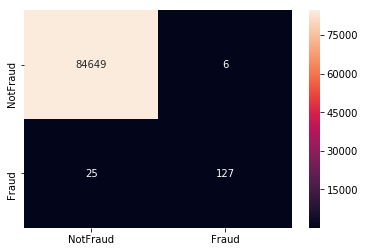

In [61]:
rfpreds = forest.predict(X_val)
cm = confusion_matrix(df_val['Class'], rfpreds)
df_cm = pd.DataFrame(cm, index = [i for i in ['NotFraud','Fraud']],
                  columns = [i for i in ['NotFraud','Fraud']])
sn.heatmap(df_cm, annot=True,fmt="d")
plt.show()

In [62]:
accuracy_score(df_val['Class'], rfpreds)

0.99963446413621515

In [71]:
forestweights = pd.DataFrame()
forestweights['weights'] = forest.feature_importances_
forestweights['classes'] = list(df.drop(['Class'], axis=1))
forestweights.sort_values(by=['weights'], ascending=False).head(100)

,weights,classes
14,0.186435,V14
17,0.134582,V17
12,0.114425,V12
10,0.098057,V10
16,0.065867,V16
11,0.048434,V11
3,0.044985,V3
4,0.039518,V4
9,0.025052,V9
18,0.022829,V18


In [19]:
boost = AdaBoostClassifier(RandomForestClassifier(max_depth=1,random_state=42), n_estimators=200)
boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=200, random_state=None)

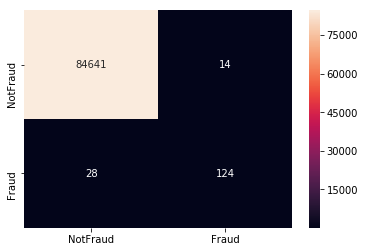

In [53]:
adapreds = boost.predict(X_val)
adacm = confusion_matrix(df_val['Class'], adapreds)
adadf_cm = pd.DataFrame(adacm, index = [i for i in ['NotFraud','Fraud']],
                  columns = [i for i in ['NotFraud','Fraud']])
sn.heatmap(adadf_cm, annot=True,fmt="d")
plt.show()

In [22]:
accuracy_score(df_val['Class'], adapreds)

0.99950475786196891

In [47]:
extra = ExtraTreesClassifier(n_estimators=200,random_state=42, criterion='entropy')
extra.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

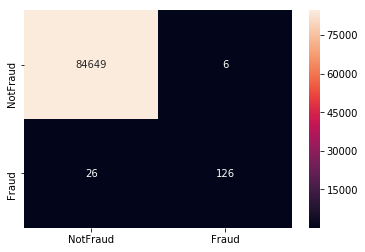

In [51]:
xpreds = extra.predict(X_val)
xcm = confusion_matrix(df_val['Class'], xpreds)
xdf_cm = pd.DataFrame(xcm, index = [i for i in ['NotFraud','Fraud']],
                  columns = [i for i in ['NotFraud','Fraud']])
sn.heatmap(xdf_cm, annot=True,fmt="d")
plt.show()

In [52]:
accuracy_score(df_val['Class'], xpreds)

0.99962267265673821

In [25]:
df_scaled = pd.read_csv("creditcard.csv")
df_scaled = shuffle(df_scaled)
df_sval = df_scaled.tail(84807)
df_strain = df_scaled.head(200000)

In [26]:
X_strain = df_strain[list(df_strain.drop(['Class'], axis=1))].values
y_strain = df_strain['Class'].values
X_sval = df_sval[list(df_sval.drop(['Class'], axis=1))].values
y_sval = df_sval['Class']

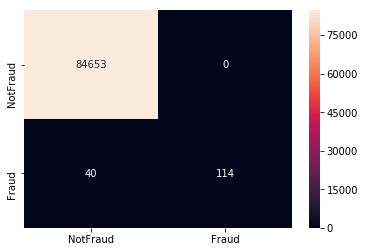

In [27]:
sforest = RandomForestClassifier(n_estimators=100,random_state=42, criterion='entropy',oob_score=True)
sforest.fit(X_strain, y_strain)
rfspreds = sforest.predict(X_sval)
cms = confusion_matrix(df_sval['Class'], rfspreds)
dfs_cm = pd.DataFrame(cms, index = [i for i in ['NotFraud','Fraud']],
                  columns = [i for i in ['NotFraud','Fraud']])
sn.heatmap(dfs_cm, annot=True,fmt="d")
plt.show()

In [28]:
accuracy_score(df_sval['Class'], rfspreds)

0.9995283408209228

In [33]:
imp = permutation_importances(sforest, df_strain[list(df_strain.drop(['Class'], axis=1))], df_strain['Class'],
                              oob_classifier_accuracy)

In [35]:
srfw = pd.DataFrame()
srfw['weights'] = imp
srfw['classes'] = list(df_strain.drop(['Class'], axis=1))
srfw.sort_values(by=['weights'], ascending=False).head(100)

,weights,classes
14,0.000235,V14
10,0.000110,V10
17,0.000080,V17
4,0.000030,V4
26,0.000020,V26
12,0.000020,V12
0,0.000010,Time
27,0.000010,V27
6,0.000010,V6
24,0.000010,V24


In [29]:
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

def oob_classifier_accuracy(rf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in rf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [rf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score